<a href="https://colab.research.google.com/github/Chandu106/Regression_project_01/blob/main/Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
project01 = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Regression_project_01/main/required_data_project_01.csv")

In [ ]:
project01.head()

,latitude,altitude,precipitation,humidity,windspeed,temperature
0,34.1526,3500.0,102.0,70.0,1.4,5.0
1,34.5539,2676.0,327.0,76.0,5.0,7.5
2,34.3201,2987.0,76.2,54.0,11.3,3.0
3,32.9681,4595.0,76.2,70.0,8.8,-0.5
4,34.0837,1585.0,720.0,73.0,4.8,10.8


In [ ]:
X = project01.drop("temperature", axis = 1) #features of the data
y = project01["temperature"] #labels of the dataX

In [ ]:
X.head()

,latitude,altitude,precipitation,humidity,windspeed
0,34.1526,3500.0,102.0,70.0,1.4
1,34.5539,2676.0,327.0,76.0,5.0
2,34.3201,2987.0,76.2,54.0,11.3
3,32.9681,4595.0,76.2,70.0,8.8
4,34.0837,1585.0,720.0,73.0,4.8


In [ ]:
y.head()

0     5.0
1     7.5
2     3.0
3    -0.5
4    10.8
Name: temperature, dtype: float64

In [ ]:
# splitting our data as training and testing to train our model

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
len(X) , len(X_train) , len(X_test)
len(y) , len(y_train) , len(y_test)

(116, 92, 24)

#Modelling

###Building our first model without normaliztion of the values

###model_01

In [ ]:
# All the training and testing data is ready we have to build a model

# set random seed 
tf.random.set_seed(42)

#creating the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compiling the model 
model_01.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mae"])

#fit the model 

model_01.fit(X_train , y_train , epochs = 100)


Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 730006.6875 - mae: 730006.6250
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 528469491712.0000 - mae: 528469491712.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 50971507932790784.0000 - mae: 50971507932790784.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 55723722736598507323392.0000 - mae: 55723722736598507323392.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 558568307801556968165070602240.0000 - mae: 558568307801556968165070602240.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 287732264170713052157688417697660928.0000 - mae: 287732264170713052157688417697660928.0000
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: inf - mae: inf
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: inf - mae: inf
Epoch 9/100
3/3 [=======================

###model_02

In [ ]:
tf.random.set_seed(42)

model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_02.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["mae"])

history = model_02.fit(X_train , y_train , epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 34.9919 - mae: 34.9919
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 14.4890 - mae: 14.4890
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 12.4470 - mae: 12.4470
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 10.2813 - mae: 10.2813
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 10.6612 - mae: 10.6612
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 8.1809 - mae: 8.1809
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 11.3997 - mae: 11.3997
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 7.7359 - mae: 7.7359
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 11.4525 - mae: 11.4525
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 8.6412 - mae: 8.6412
Epoch 11/100
3/3 [==============================] - 0s 4ms/step -

In [ ]:
model_02.evaluate(X_test , y_test)

1/1 [==============================] - 0s 89ms/step - loss: 15.6426 - mae: 15.6426


[15.64256763458252, 15.64256763458252]

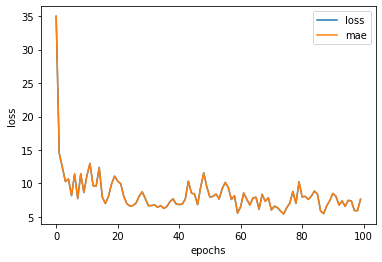

In [ ]:
# plot the loss curves of model_02 

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

###model_03

In [ ]:
tf.random.set_seed(42)

model_03 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_03.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["mae"])

history = model_03.fit(X_train , y_train , epochs = 200)

Epoch 1/200
3/3 [==============================] - 0s 5ms/step - loss: 34.9919 - mae: 34.9919
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 14.4890 - mae: 14.4890
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 12.4470 - mae: 12.4470
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 10.2813 - mae: 10.2813
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 10.6612 - mae: 10.6612
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 8.1809 - mae: 8.1809
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 11.3997 - mae: 11.3997
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 7.7359 - mae: 7.7359
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 11.4525 - mae: 11.4525
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 8.6412 - mae: 8.6412
Epoch 11/200
3/3 [==============================] - 0s 5ms/step -

In [ ]:
model_03.evaluate(X_test , y_test)

1/1 [==============================] - 0s 90ms/step - loss: 19.8237 - mae: 19.8237


[19.823699951171875, 19.823699951171875]

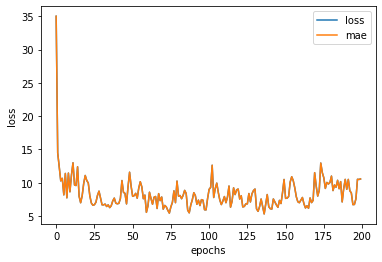

In [ ]:
# plotting the loss curves of model_03

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

###model_04

In [ ]:
tf.random.set_seed(42)

model_04 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_04.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["mae"])

history = model_04.fit(X_train , y_train , epochs = 150)

Epoch 1/150
3/3 [==============================] - 0s 5ms/step - loss: 34.9919 - mae: 34.9919
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 14.4890 - mae: 14.4890
Epoch 3/150
3/3 [==============================] - 0s 6ms/step - loss: 12.4470 - mae: 12.4470
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 10.2813 - mae: 10.2813
Epoch 5/150
3/3 [==============================] - 0s 5ms/step - loss: 10.6612 - mae: 10.6612
Epoch 6/150
3/3 [==============================] - 0s 8ms/step - loss: 8.1809 - mae: 8.1809
Epoch 7/150
3/3 [==============================] - 0s 8ms/step - loss: 11.3997 - mae: 11.3997
Epoch 8/150
3/3 [==============================] - 0s 10ms/step - loss: 7.7359 - mae: 7.7359
Epoch 9/150
3/3 [==============================] - 0s 7ms/step - loss: 11.4525 - mae: 11.4525
Epoch 10/150
3/3 [==============================] - 0s 9ms/step - loss: 8.6412 - mae: 8.6412
Epoch 11/150
3/3 [==============================] - 0s 6ms/step 

In [ ]:
model_04.evaluate(X_test , y_test)

1/1 [==============================] - 0s 228ms/step - loss: 5.5913 - mae: 5.5913


[5.591343402862549, 5.591343402862549]

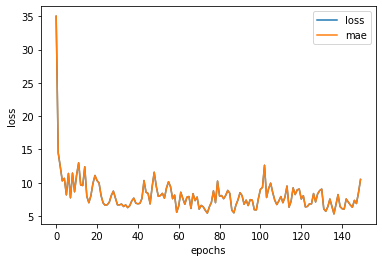

In [ ]:
#plotting the loss curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

###model_05

In [ ]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_05 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 1000 units
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_05.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
model_05.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 12ms/step - loss: 243.2385 - mae: 243.2385
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 247.6932 - mae: 247.6932
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 119.0123 - mae: 119.0123
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 127.4936 - mae: 127.4936
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 91.3864 - mae: 91.3864
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 69.4469 - mae: 69.4469
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 46.2064 - mae: 46.2064
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 90.0428 - mae: 90.0428
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 51.1489 - mae: 51.1489
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 32.7130 - mae: 32.7130
Epoch 11/100
3/3 [==============================]

In [ ]:
model_05.evaluate(X_test , y_test)

1/1 [==============================] - 0s 189ms/step - loss: 9.7062 - mae: 9.7062


[9.706170082092285, 9.706170082092285]

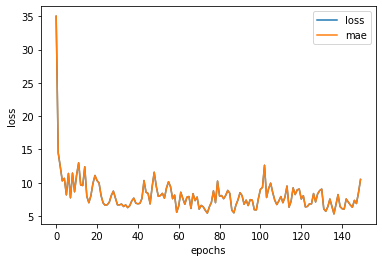

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_06 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 1000 units
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_06.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
model_06.fit(X_train, y_train, epochs=1000 , verbose = 0)

In [ ]:
model_06.evaluate(X_test , y_test)

1/1 [==============================] - 0s 173ms/step - loss: 5.2596 - mae: 5.2596


[5.259592056274414, 5.259592056274414]

In [ ]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_07 = tf.keras.Sequential([
  tf.keras.layers.Dense(10000), 
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),  
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_07.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr = 0.001), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = model_07.fit(X_train, y_train, epochs=1000 , verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_07.evaluate(X_test , y_test)

1/1 [==============================] - 0s 99ms/step - loss: 4.5422 - mae: 4.5422


[4.542191028594971, 4.542191028594971]

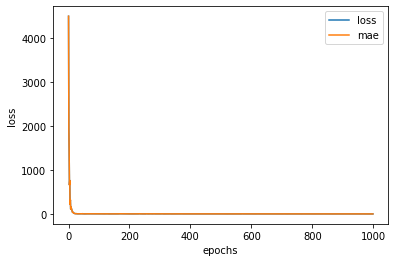

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_08 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_08.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["mae"])

# Fit the model
history = model_08.fit(X, y, epochs=1000 , verbose = 0)

In [ ]:
model_08.evaluate(X_test , y_test)

1/1 [==============================] - 0s 95ms/step - loss: 3.0563 - mae: 3.0563


[3.056285858154297, 3.056285858154297]

###Normalizing the data converting each and every value between 0 and 1

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["latitude", "altitude", "precipitation", "humidity", "windspeed"])
)

X = project01.drop("temperature", axis = 1)
y = project01["temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train) #fitting the data

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[0]

array([0.85966469, 0.05375408, 0.22197991, 0.56862745, 0.04255319])

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_09 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_09.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_09.fit(X_train_normal, y_train, epochs=500, verbose=0) 

In [ ]:
model_09.evaluate(X_test_normal , y_test)

1/1 [==============================] - 0s 99ms/step - loss: 3.1406 - mae: 3.1406


[3.140604019165039, 3.140604019165039]

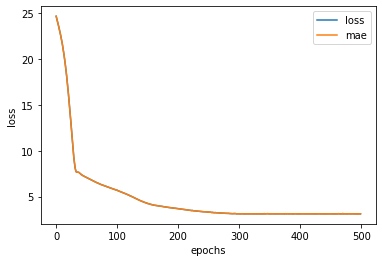

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

###model_10

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_10.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_10.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 24.8971 - mae: 24.8971
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 23.4034 - mae: 23.4034
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 21.5738 - mae: 21.5738
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 19.0794 - mae: 19.0794
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 15.9195 - mae: 15.9195
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 12.1966 - mae: 12.1966
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 8.8540 - mae: 8.8540
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 8.4955 - mae: 8.4955
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 9.7018 - mae: 9.7018
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 8.8831 - mae: 8.8831
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - l

In [ ]:
model_10.evaluate(X_test_normal , y_test)

1/1 [==============================] - 0s 99ms/step - loss: 3.1208 - mae: 3.1208


[3.1208086013793945, 3.1208086013793945]

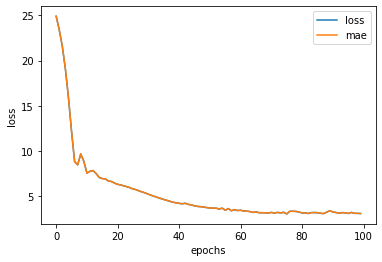

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

###model_11

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
#   tf.keras.layers.Dense(100),
#   tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_11.fit(X_train_normal, y_train, epochs=500 , verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_11.evaluate(X_test_normal , y_test)

1/1 [==============================] - 0s 101ms/step - loss: 3.1438 - mae: 3.1438


[3.1438114643096924, 3.1438114643096924]

In [ ]:
y_preds = model_08.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [ ]:
y_preds


array([[26.025763 ],
       [13.200359 ],
       [23.023794 ],
       [25.394152 ],
       [13.701297 ],
       [28.017328 ],
       [23.570196 ],
       [24.69771  ],
       [27.984365 ],
       [15.533218 ],
       [26.364172 ],
       [23.497854 ],
       [27.67272  ],
       [25.201807 ],
       [22.18501  ],
       [ 3.5474102],
       [34.788498 ],
       [27.249762 ],
       [19.183414 ],
       [18.763369 ],
       [27.80514  ],
       [28.9994   ],
       [27.775246 ],
       [20.823753 ]], dtype=float32)

In [ ]:
y_test

83     29.00
4      10.80
42     23.50
40     25.40
10     15.00
47     20.88
110    25.00
36     24.05
70     34.00
11     24.46
45     24.80
26     23.80
94     36.00
53     24.44
18     21.11
0       5.00
56     32.00
85     31.00
109    18.00
100    23.00
93     35.00
88     32.00
67     33.00
12     22.00
Name: temperature, dtype: float64

In [ ]:
X1 = project01["latitude"]
y = project01["temperature"]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train , X1_test , y_train , y_test = train_test_split(X1,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
y_preds = model_08.predict(X_test)

1/1 [==============================] - 0s 13ms/step


In [ ]:
def plot_predictions(train_data=X1_train, 
                     train_labels=y_train, 
                     test_data=X1_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
#   plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.xlabel("latitude")
  plt.ylabel("Temperature")
  # Show the legend
  plt.legend();

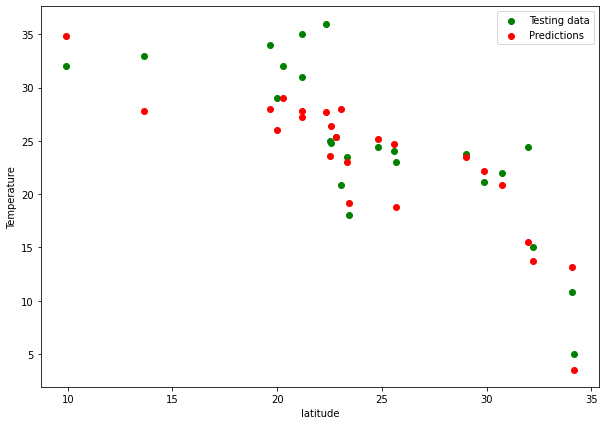

In [ ]:
plot_predictions(train_data=X1_train,
                 train_labels=y_train,
                 test_data=X1_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
X2 = project01["altitude"]
y = project01["temperature"]

In [ ]:
from sklearn.model_selection import train_test_split
X2_train , X2_test , y_train , y_test = train_test_split(X2,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
def plot_predictions(train_data=X2_train, 
                     train_labels=y_train, 
                     test_data=X2_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
#   plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.xlabel("Altitude")
  plt.ylabel("Temperature")
  # Show the legend
  plt.legend();

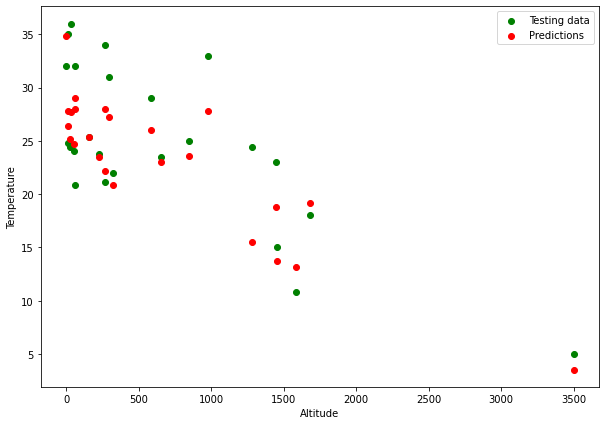

In [ ]:
plot_predictions(train_data=X2_train,
                 train_labels=y_train,
                 test_data=X2_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
X3 = project01["precipitation"]
y = project01["temperature"]

In [ ]:
from sklearn.model_selection import train_test_split
X3_train , X3_test , y_train , y_test = train_test_split(X3,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
def plot_predictions(train_data=X3_train, 
                     train_labels=y_train, 
                     test_data=X3_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
#   plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.xlabel("Precipitation")
  plt.ylabel("Temperature")
  # Show the legend
  plt.legend();

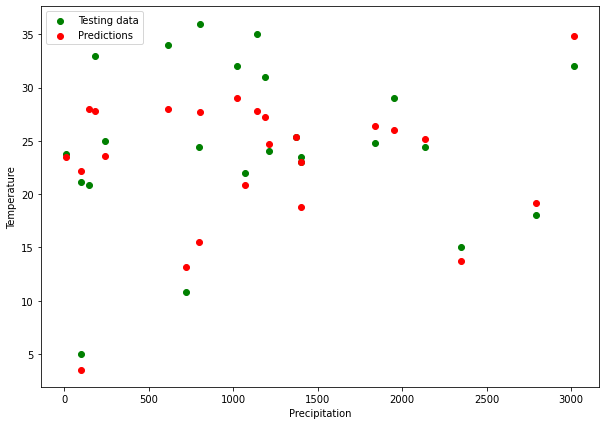

In [ ]:
plot_predictions(train_data=X3_train,
                 train_labels=y_train,
                 test_data=X3_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
X4 = project01["humidity"]
y = project01["temperature"]

In [ ]:
from sklearn.model_selection import train_test_split
X4_train , X4_test , y_train , y_test = train_test_split(X4,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
def plot_predictions(train_data=X4_train, 
                     train_labels=y_train, 
                     test_data=X4_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
#   plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.xlabel("Humidity")
  plt.ylabel("Temperature")
  # Show the legend
  plt.legend();

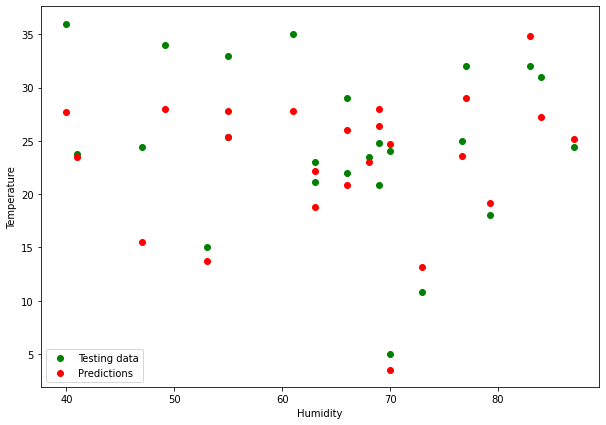

In [ ]:
plot_predictions(train_data=X4_train,
                 train_labels=y_train,
                 test_data=X4_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
X5 = project01["windspeed"]
y = project01["temperature"]

In [ ]:
from sklearn.model_selection import train_test_split
X5_train , X5_test , y_train , y_test = train_test_split(X5,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

In [ ]:
def plot_predictions(train_data=X5_train, 
                     train_labels=y_train, 
                     test_data=X5_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
#   plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.xlabel("WindSpeed")
  plt.ylabel("Temperature")
  # Show the legend
  plt.legend();

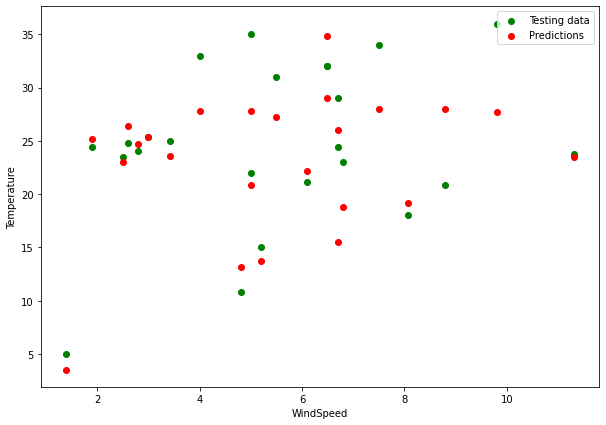

In [ ]:
plot_predictions(train_data=X5_train,
                 train_labels=y_train,
                 test_data=X5_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
import pandas as pd
pd.DataFrame(y_preds,y_test)

,0
temperature,
29.00,26.025763
10.80,13.200359
23.50,23.023794
25.40,25.394152
15.00,13.701297
20.88,28.017328
25.00,23.570196
24.05,24.697710
34.00,27.984365
